# COVID-19’s impact on homelessness in California

## Research Question: What was the impact of COVID-19 on the homeless populations in various counties of California, and what factors influenced these effects?

# Hypothesis #1-Yash Sharma

### Less affluent counties were more impacted by COVID-19 than more affluent counties, correlating with higher homelessness.


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as n
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [88]:
#Set to 2 decimal places, and display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

In [90]:
df2019  = pd.read_csv('HomelessnessbyCountyOverTime - 2019.csv', index_col=0)
df2020  = pd.read_csv('HomelessnessbyCountyOverTime - 2020.csv', index_col=0)
df2022  = pd.read_csv('HomelessnessbyCountyOverTime - 2022.csv', index_col=0)
df2023  = pd.read_csv('HomelessnessbyCountyOverTime - 2023.csv', index_col=0)
df_countyincomes  = pd.read_csv('HomelessnessbyCountyOverTime - County Incomes.csv', index_col=0)
df_monetaryrelief  = pd.read_csv('HomelessnessbyCountyOverTime - Monetary Relief.csv', index_col=0)

In [69]:
df2019 = df2019.rename(columns={"Homeless Total": "Homeless Total_2019"})
df2020 = df2020.rename(columns={"Homeless Total": "Homeless Total_2020"})
df2022 = df2022.rename(columns={"Homeless Total": "Homeless Total_2022"})
df2023 = df2023.rename(columns={"Homeless Total": "Homeless Total_2023"})

In [71]:
df_countyincomes.head()

,Median Income
County Name,
San Jose/Santa Clara,153792
Daly City/San Mateo,149907
Marin,142019
San Francisco,136689
Oakland,122488


In [73]:
df_monetaryrelief.head()

,Monetary Relief
County Name,
San Jose/Santa Clara,31514029.00
Daly City/San Mateo,17794236.00
Marin,26594123.00
San Francisco,20660712.00
Oakland,NaN


In [75]:
df = (df2019.merge(df2020, on="County Name", how="inner")
                 .merge(df2022, on="County Name", how="inner")
                 .merge(df2023, on="County Name", how="inner")
                 .merge(df_countyincomes, on="County Name", how="inner")
                 .merge(df_monetaryrelief, on="County Name", how="inner"))
df = df.drop("California", axis=0)
df = df.dropna()
df.head(5)

,Homeless Total_2019,Homeless Total_2020,Homeless Total_2022,Homeless Total_2023,Median Income,Monetary Relief
County Name,,,,,,
San Jose/Santa Clara,9706,9605,10028,9903,153792,31514029.00
San Francisco,8035,8124,7754,7582,136689,20660712.00
Sacramento,5561,5511,9278,9281,84010,24982972.00
"Santa Rosa, Petaluma/Sonoma",2951,2745,2893,2266,99266,50263852.00
Richmond/Contra Costa,2295,2277,3093,2372,120020,26546260.00


In [77]:
# Quick comparison of yearly totals
print(df[["Homeless Total_2019", "Homeless Total_2020", "Homeless Total_2022", "Homeless Total_2023"]].describe())

       Homeless Total_2019  Homeless Total_2020  Homeless Total_2022  \
count                39.00                39.00                39.00   
mean               3502.67              3758.85              3942.41   
std                8980.92             10121.29             10370.68   
min                 192.00               169.00               140.00   
25%                 636.00               692.00               748.00   
50%                1349.00              1527.00              1448.00   
75%                2557.50              2711.00              2993.00   
max               56257.00             63706.00             65111.00   

       Homeless Total_2023  
count                39.00  
mean               4194.00  
std               11353.00  
min                  88.00  
25%                 720.00  
50%                1532.00  
75%                2487.50  
max               71320.00  


In [79]:
# Load the datasets
df_countyincomes = pd.read_csv('HomelessnessbyCountyOverTime - County Incomes.csv', index_col=0)
df_monetaryrelief = pd.read_csv('HomelessnessbyCountyOverTime - Monetary Relief.csv', index_col=0)

In [81]:
# Merge the datasets on "County Name"
df = pd.merge(df_countyincomes, df_monetaryrelief, on="County Name", how="inner")
# Rename columns for clarity
df.rename(columns={"Median Income": "Median_Income", "Monetary Relief": "Monetary_Relief"}, inplace=True)

In [83]:
# Handle missing values
df["Monetary_Relief"] = pd.to_numeric(df["Monetary_Relief"], errors="coerce")
df.fillna(0, inplace=True)

In [85]:
# Step 1: Create income brackets
bins = [0, 60000, 80000, 100000, 120000, 140000, 160000]
labels = ["<60K", "60-80K", "80-100K", "100-120K", "120-140K", "140K+"]
df["Income Bracket"] = pd.cut(df["Median_Income"], bins=bins, labels=labels, include_lowest=True)
df = df[df.index != "California"]

In [87]:
# Step 2: Create a pivot table for the heatmap
heatmap_data = df.pivot_table(values="Monetary_Relief", index="Income Bracket", columns="County Name", aggfunc="sum")
# Step 3: Transpose the pivot table to have regions on the x-axis and income brackets on the y-axis
heatmap_data = heatmap_data.transpose()
# Filter out rows where all values are zero
heatmap_data = heatmap_data.loc[~(heatmap_data == 0).all(axis=1)]

# Remove columns with all zeroes if needed
heatmap_data = heatmap_data.loc[:, ~(heatmap_data == 0).all(axis=0)]

/var/folders/s_/b8ftbst93f787fwsbl3mjbf40000gn/T/ipykernel_51850/1377049574.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(values="Monetary_Relief", index="Income Bracket", columns="County Name", aggfunc="sum")


<Figure size 3000x2000 with 0 Axes>

<Axes: xlabel='Income Bracket', ylabel='County Name'>

Text(0.5, 1.0, 'Heatmap: Monetary Relief by Income Bracket and Region')

Text(0.5, 190.7222222222222, 'Income Bracket')

Text(345.7222222222222, 0.5, 'Region (Monetary Relief)')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, '<60K'),
  Text(1.5, 0, '60-80K'),
  Text(2.5, 0, '80-100K'),
  Text(3.5, 0, '100-120K'),
  Text(4.5, 0, '120-140K'),
  Text(5.5, 0, '140K+')])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5]),
 [Text(0, 0.5, 'Alpine, Inyo, Mono'),
  Text(0, 1.5, 'Amador, Calaveras, Mariposa, Tuolumne'),
  Text(0, 2.5, 'Bakersfield/Kern'),
  Text(0, 3.5, 'Chico, Paradise/Butte'),
  Text(0, 4.5, 'Colusa, Glenn, Trinity'),
  Text(0, 5.5, 'Daly City/San Mateo'),
  Text(0, 6.5, 'Davis, Woodland/Yolo'),
  Text(0, 7.5, 'El Dorado'),
  Text(0, 8.5, 'Fresno'),
  Text(0, 9.5, 'Glendale'),
  Text(0, 10.5, 'Humboldt'),
  Text(0, 11.5, 'Imperial'),
  Text(0, 12.5, 'Lake'),
  Text(0, 13.5, 'Los Angeles'),
  Text(0, 14.5, 'Marin'),
  Text(0, 15.5, 'Mendocino'),
  Text(0, 16.5, 'Merced'),
  Text(0, 17.5, 'Napa'),
  Text(0, 18.5, 'Nevada'),
  Text(0, 19.5, 'Oxnard, San Buenaventura/Ventura'),
  Text(0, 20.5, 'Redding/Shasta, Siskiyou

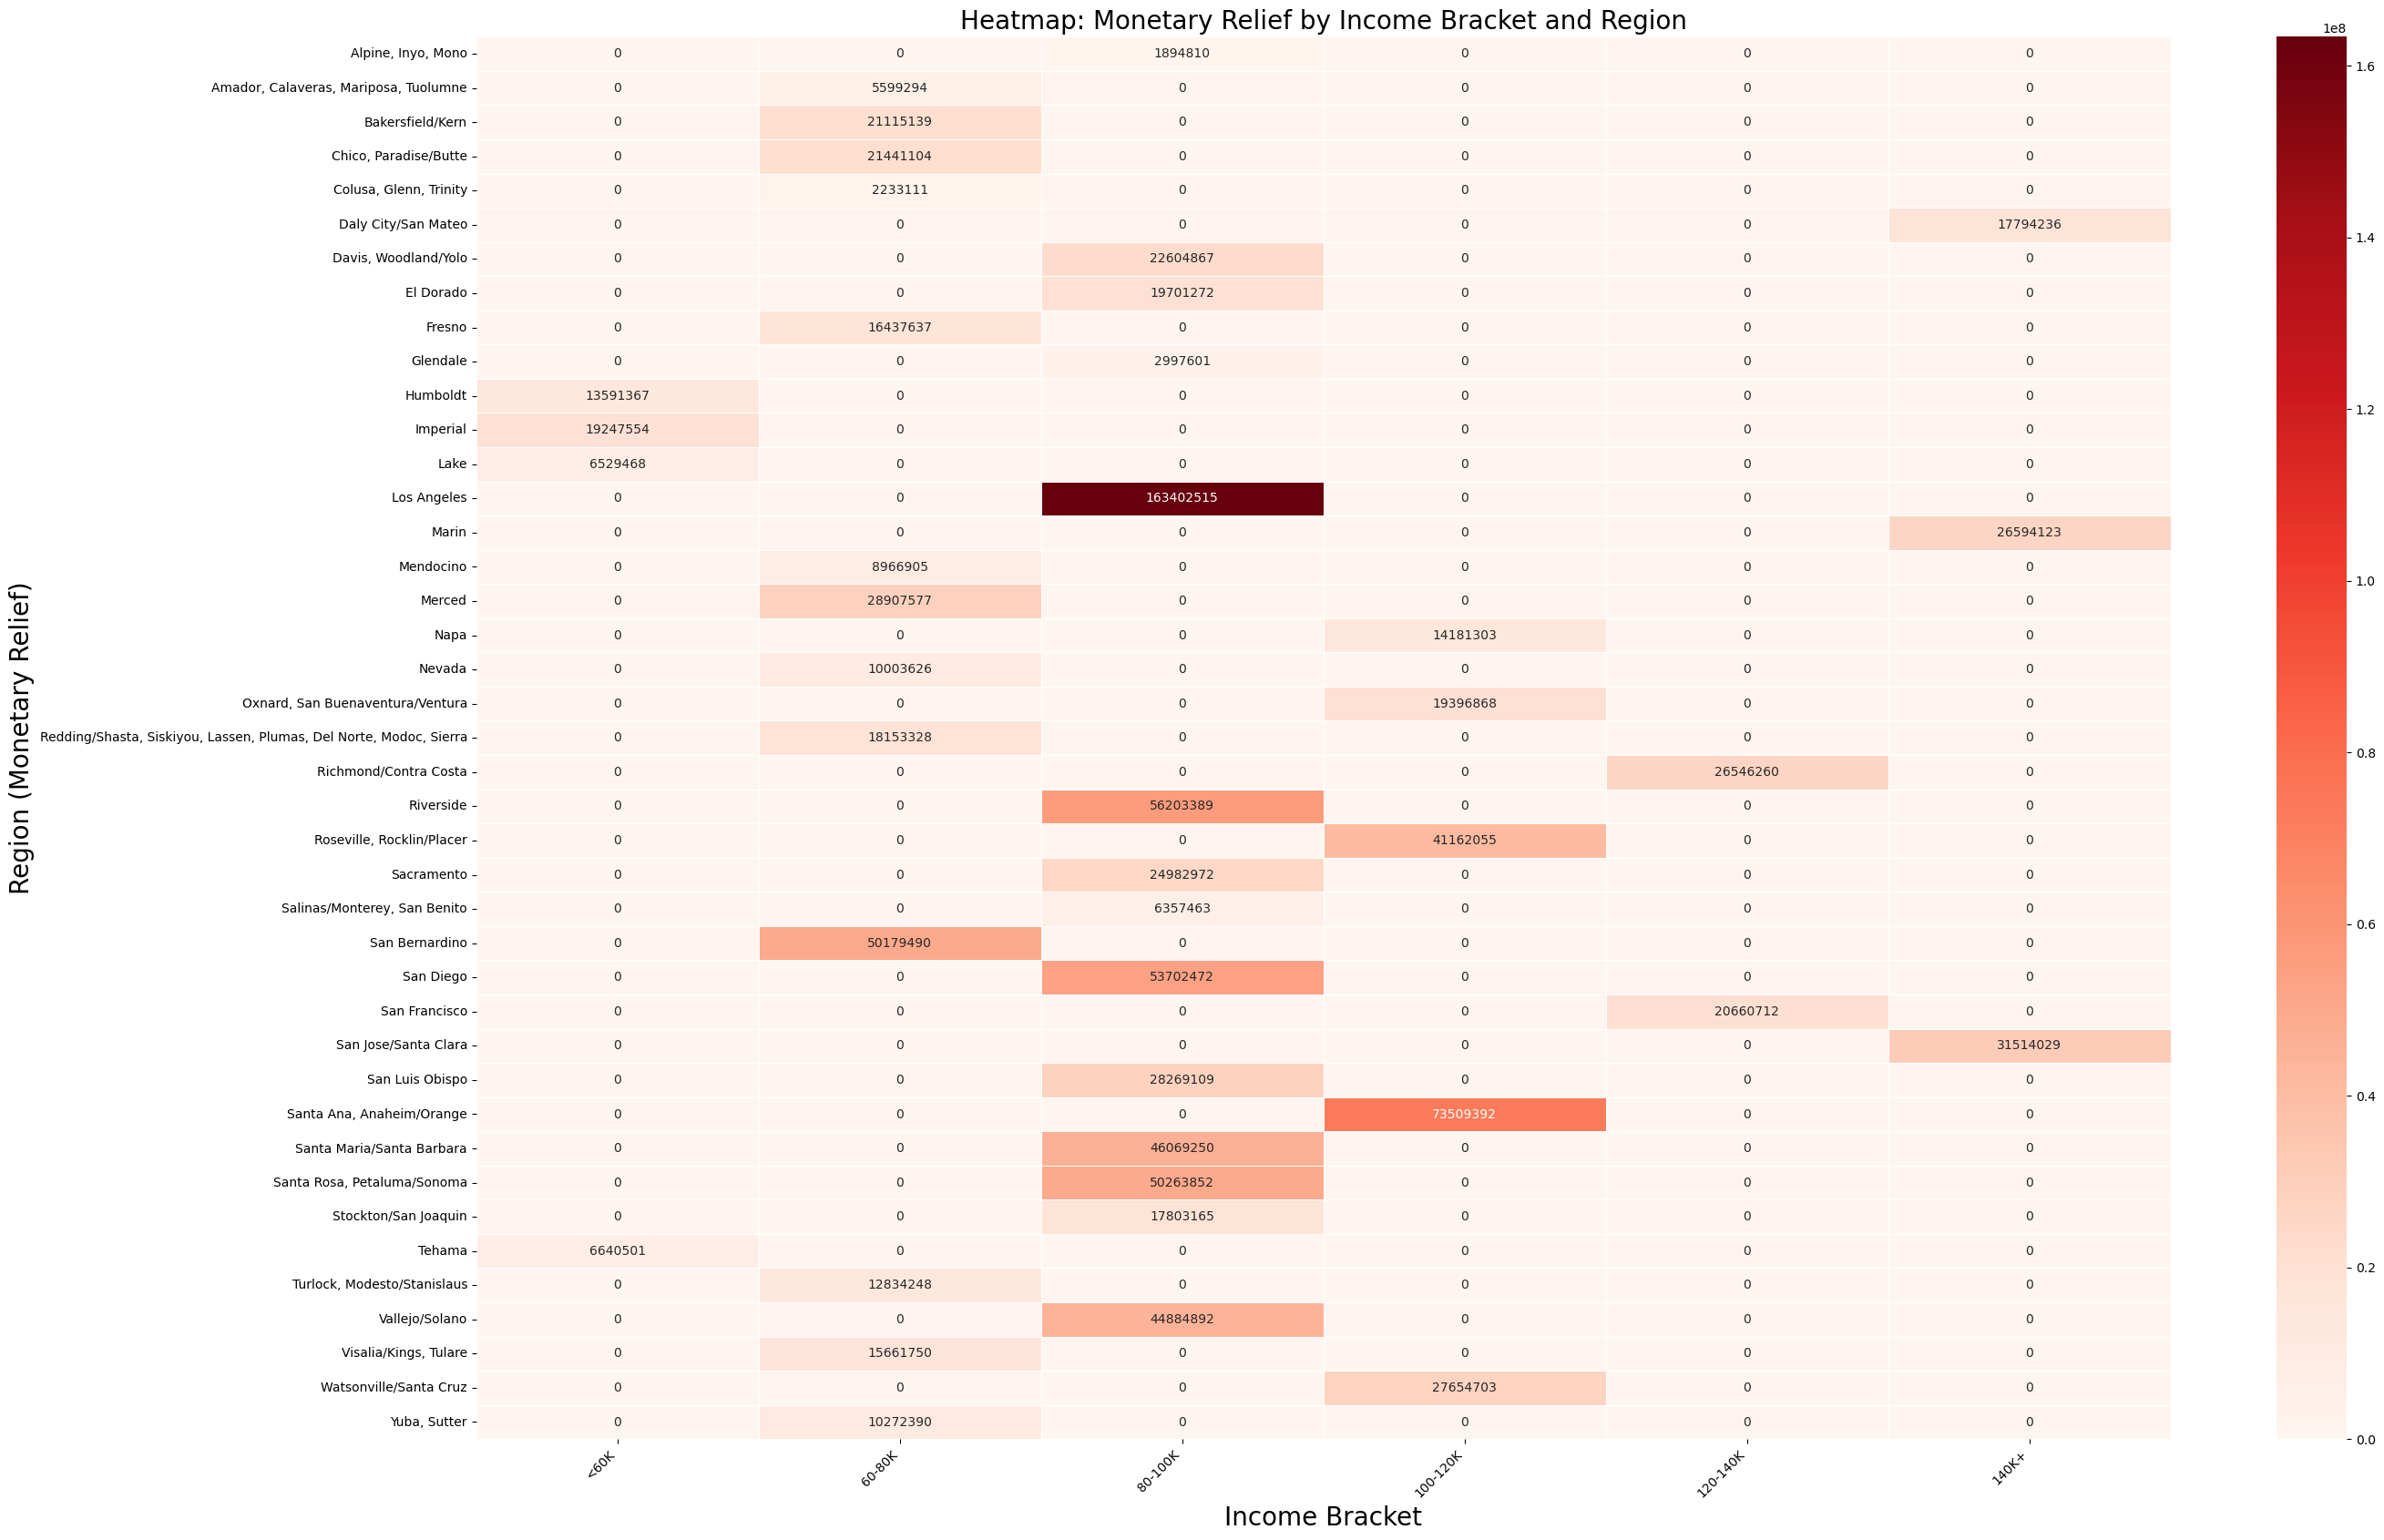

In [89]:
# Step 4: Plot the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt=".0f", cbar=True, linewidths=0.5)
plt.title("Heatmap: Monetary Relief by Income Bracket and Region", fontsize=20)
plt.xlabel("Income Bracket", fontsize=20)
plt.ylabel("Region (Monetary Relief)", fontsize=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [90]:
#create a linear regression which shows the correlation between homeless population by counties and monetary relief recieved by each county

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Linear Regression: Homeless Population and Monetary Relief')

Text(0.5, 0, 'Homeless Population (2023)')

Text(0, 0.5, 'Monetary Relief (Millions of $)')

(0.0, 12000.0)

(0.0, 170.0)

([<matplotlib.axis.XTick at 0x15bbe7b90>,
 [Text(0, 0, '0'),
  Text(1000, 0, '1000'),
  Text(2000, 0, '2000'),
  Text(3000, 0, '3000'),
  Text(4000, 0, '4000'),
  Text(5000, 0, '5000'),
  Text(6000, 0, '6000'),
  Text(7000, 0, '7000'),
  Text(8000, 0, '8000'),
  Text(9000, 0, '9000'),
  Text(10000, 0, '10000'),
  Text(11000, 0, '11000')])

Text(1500, 150, 'R² = 0.71\nP-value = 1.34e-11')

Text(0, -10, 'Santa Rosa, Petaluma/Sonoma')

Text(0, -10, 'Los Angeles')

Text(0, -10, 'San Diego')

Text(0, -10, 'Santa Ana, Anaheim/Orange')

Text(0, -10, 'Riverside')

Text(0, -10, 'San Bernardino')

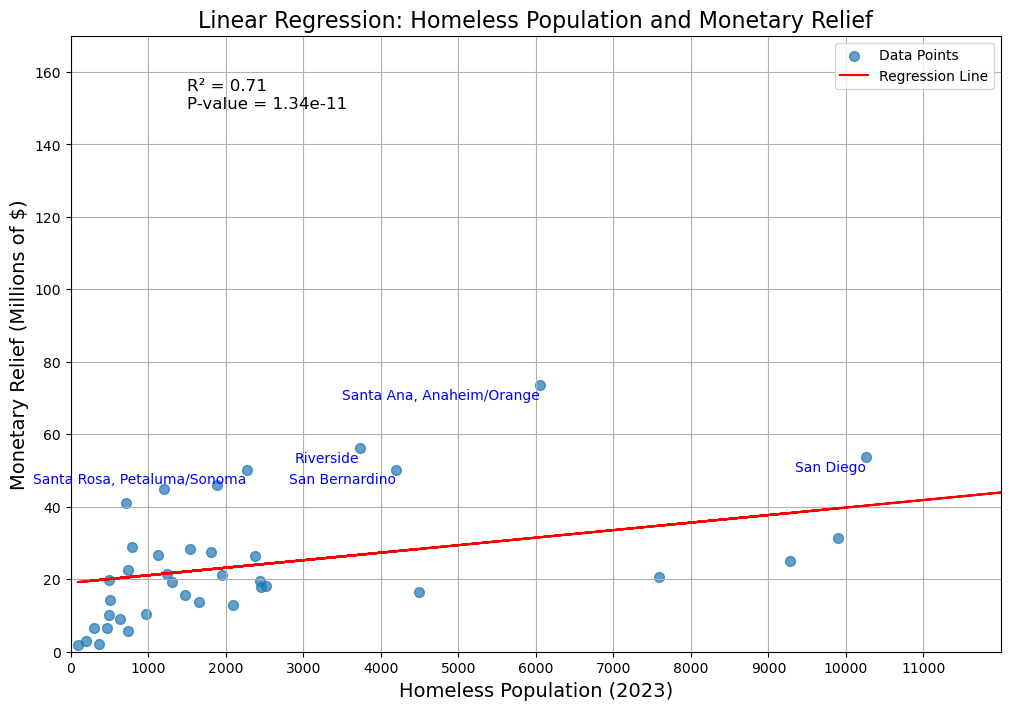

R-squared: 0.71
P-value: 1.34e-11

Outliers (Counties with more more than 50 million in Monetary Relief):
                             Homeless_Total_2023  Monetary_Relief
County Name                                                      
Santa Rosa, Petaluma/Sonoma                 2266      50263852.00
Los Angeles                                71320     163402515.00
San Diego                                  10264      53702472.00
Santa Ana, Anaheim/Orange                   6050      73509392.00
Riverside                                   3725      56203389.00
San Bernardino                              4195      50179490.00


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load datasets
df2023 = pd.read_csv('HomelessnessbyCountyOverTime - 2023.csv', index_col=0)
df_monetaryrelief = pd.read_csv('HomelessnessbyCountyOverTime - Monetary Relief.csv', index_col=0)

# Rename columns for clarity
df2023 = df2023.rename(columns={"Homeless Total": "Homeless_Total_2023"})
df_monetaryrelief = df_monetaryrelief.rename(columns={"Monetary Relief": "Monetary_Relief"})

# Clean and convert monetary relief to numeric
df_monetaryrelief["Monetary_Relief"] = (
    df_monetaryrelief["Monetary_Relief"]
    .replace(r"[\$,]", "", regex=True)  # Remove dollar signs and commas
    .astype(float)  # Convert to float
)

# Merge datasets on "County Name"
df = pd.merge(df2023, df_monetaryrelief, left_index=True, right_index=True)

# Drop rows with missing values
df = df.dropna()

df = df[df.index != "California"]

# Extract variables for regression
x = df["Homeless_Total_2023"]
y = df["Monetary_Relief"] / 1_000_000  # Convert monetary relief to millions

# Perform linear regression
regression = linregress(x, y)

# Extract R-squared and p-value
r_squared = regression.rvalue**2
p_value = regression.pvalue

# Plotting the results
plt.figure(figsize=(12, 8))
plt.scatter(x, y, alpha=0.7, label="Data Points", s=50)
plt.plot(x, regression.intercept + regression.slope * x, color="red", label="Regression Line")
plt.title("Linear Regression: Homeless Population and Monetary Relief", fontsize=16)
plt.xlabel("Homeless Population (2023)", fontsize=14)
plt.ylabel("Monetary Relief (Millions of $)", fontsize=14)  # Update y-axis label
plt.legend()
plt.grid(True)

# Adjust x-axis and y-axis range
plt.xlim(0, 12000)  # Set x-axis limits from 0 to 80,000
plt.ylim(0, 170)  # Set y-axis limits to 0 to 170 million to focus on the majority of data

# Set x-axis ticks separated by 1000
plt.xticks(ticks=range(0, 12000, 1000))

# Display the R-squared and p-value on the plot
plt.text(
    1500,  # Adjust x-coordinate of the text position
    150,  # Adjust y-coordinate to fit in the reduced range
    f"R² = {r_squared:.2f}\nP-value = {p_value:.2e}",
    fontsize=12,
    color="black",
)
# Annotate outliers like Los Angeles
outliers = df[(df["Homeless_Total_2023"] > 10000) | (df["Monetary_Relief"] > 50_000_000)]
for idx, row in outliers.iterrows():
    plt.annotate(
        idx,
        (row["Homeless_Total_2023"], row["Monetary_Relief"] / 1_000_000),
        fontsize=10,
        color="blue",
        ha="right",
        xytext=(0, -10),
        textcoords="offset points"
    )

plt.show()

# Print R-squared and p-value to console
print(f"R-squared: {r_squared:.2f}")
print(f"P-value: {p_value:.2e}")
# Identify and print outliers where counties have more than 10,000 homeless and received more than 50 million
print("\nOutliers (Counties with more more than 50 million in Monetary Relief):")
outliers = df[(df["Homeless_Total_2023"] > 10000) | (df["Monetary_Relief"] > 50_000_000)]
print(outliers[["Homeless_Total_2023", "Monetary_Relief"]])

LinearRegression()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='MedianIncome', ylabel='MonetaryRelief'>

Text(0.5, 1.0, 'Linear Regression: Median Income vs Monetary Relief')

Text(0.5, 0, 'Median Income ($)')

Text(0, 0.5, 'Monetary Relief ($) by millions')

(0.0, 170.0)

([<matplotlib.axis.YTick at 0x15be8e4e0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100'),
  Text(0, 120, '120'),
  Text(0, 140, '140'),
  Text(0, 160, '160')])

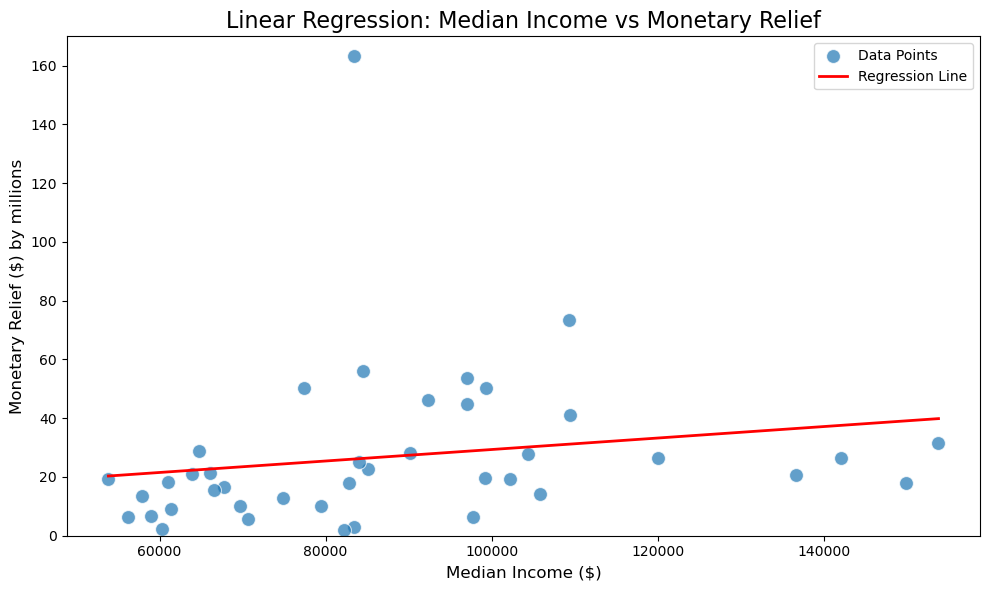

Intercept: 9.80
R-squared: 0.03
R-value (Correlation Coefficient): 0.18
P-value: 1.34e-11

Outliers (Counties with more than 50 million in Monetary Relief):
                             MedianIncome  MonetaryRelief
County Name                                              
Santa Ana, Anaheim/Orange          109361     73509392.00
Santa Rosa, Petaluma/Sonoma         99266     50263852.00
San Diego                           96974     53702472.00
Riverside                           84505     56203389.00
Los Angeles                         83411    163402515.00
San Bernardino                      77423     50179490.00


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the median income data
df_countyincomes = pd.read_csv('HomelessnessbyCountyOverTime - County Incomes.csv', index_col=0)

# Load the monetary relief data
df_relief = pd.read_csv('HomelessnessbyCountyOverTime - Monetary Relief.csv', index_col=0)

# Rename columns for clarity
df_countyincomes = df_countyincomes.rename(columns={"Median Income": "MedianIncome"})
df_relief = df_relief.rename(columns={"Monetary Relief": "MonetaryRelief"})

# Merge the datasets on the county identifier (assuming 'County Name' is the common column)
df_merged = pd.merge(df_countyincomes, df_relief, left_index=True, right_index=True)

# Drop rows with NaN values in either column
df_merged = df_merged.dropna(subset=["MedianIncome", "MonetaryRelief"])

# Remove the California dataset
df_merged = df_merged[df_merged.index != "California"]

# Prepare the data
X = df_merged[['MedianIncome']]  # Median Income as independent variable
y = df_merged['MonetaryRelief'] / 1_000_000 # Monetary Relief as dependent variable

# Calculate correlation and regression statistics
slope, intercept, r_value, p_value, std_err = linregress(df_merged['MedianIncome'], y)

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract R-squared and p-value
r_squared = regression.rvalue**2
p_value = regression.pvalue

# Predict values
y_pred = model.predict(X)


# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['MedianIncome'], y=y, label='Data Points', s=100, alpha=0.7)
plt.plot(X, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression: Median Income vs Monetary Relief', fontsize=16)
plt.xlabel('Median Income ($)', fontsize=12)
plt.ylabel('Monetary Relief ($) by millions', fontsize=12)
plt.ylim(0, 170)  # Set y-axis limits
plt.yticks(ticks=range(0, 171, 20))  # Set y-axis ticks from 20 to 170 with steps of 20
plt.legend()
plt.tight_layout()
plt.show()


# Print model statistics
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")
print(f"R-value (Correlation Coefficient): {r_value:.2f}")
print(f"P-value: {p_value:.2e}")


# Identify outliers where counties received more than 50 million in monetary relief
outliers = df_merged[df_merged['MonetaryRelief'] > 50_000_000]
print("\nOutliers (Counties with more than 50 million in Monetary Relief):")
print(outliers[['MedianIncome','MonetaryRelief']])

What are the findings

Heat Map: Some areas, including Santa Ana/Anaheim/Orange, Los Angeles, and San Diego, received much more monetary relief than others (Dark highlighted).Largely populated, highly urbanized areas like Los Angeles and San Diego probably have a higher rate of homelessness, which justifies providing more financial assistance.The low allocation may be explained by the fact that smaller areas, such as Alpine/Inyo/Mono, do not have severe homelessness problems. Los Angeles and San Diego might've recieved more releif due to their poltical influence and lobbying power for state or federal funds. 

Linear Regression Homeless Population and Monetary Relief: According to the R-squared value (0.71), the homeless population in 2023 accounts for 71% of the variance in financial assistance. This indicates that the number of homeless people and the amount of financial aid given have a strong positive linear relationship. The statistical significance of the association between the homeless population and financial assistance is confirmed by the tiny P-value (1.34e-11). It is highly unlikely that this relationship is due to random chance.  The significant association indicated by the R-squared value is confirmed by the regression line, which closely tracks the data points. Most data points are located close to the regression line, suggesting that financial assistance typically rises in proportion to the number of homeless people. I purposely made my x-axis up to 11,000 because I knew it couldn't be the extreme outlier Los Angeles has. This means in Los Angeles, one homeless individual potentially receives 2,290 dollars; in Santa Rosa, one homeless receives 22,190 dollars. If given more time, I would've added additional variables like housing costs and unemployment rates to determine other factors influencing monetary relief allocation, which could provide a more comprehensive understanding of how funding decisions are made. 

Linear Regression Median Income vs Monetary Relief: Given that income accounts for only 3% of the variation in relief (R-squared = 0.03), the research demonstrates that median income has little to no effect on the distribution of monetary relief. Relief allocation is not correlated with income levels, as indicated by the flat regression line and weak association (R-value = 0.18). The regression line has a slight upward slope, indicating that as median income, monetary relief tends to increase, but the relationship isn't strong because there are other contributing factors that lead to an increase in monetary relief. 

# Hypothesis #2 - Bryant

Following the start of the data (4/14/20), California’s homeless population has increased but has since decreased to a level between where it started and its peak. 2019-2023 (line graph over time for California (bolded in some way), smaller line graphs for 6-7 other counties)

This question will be answered by comparing homeless populations throughout the years 2019-2023 for the entire state as well as prominent counties

In [38]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#First importing the different CSV files needed to answer Hypothesis #2
df1 = pd.read_csv('HomelessnessbyCountyOverTime - 2019.csv')
df2 = pd.read_csv('HomelessnessbyCountyOverTime - 2020.csv')
df3 = pd.read_csv('HomelessnessbyCountyOverTime - 2022.csv')
df4 = pd.read_csv('HomelessnessbyCountyOverTime - 2023.csv')

In [49]:
#Preforming merges on the four seperate data frames to turn them into one single dataframe to make later steps easier

merged_df = df1.merge(df2, on='County Name', how='outer', suffixes=('_2019', '_2020'))
merged_df = merged_df.merge(df3, on='County Name', how='outer', suffixes=('_2020', '_2022'))
merged_df = merged_df.merge(df4, on='County Name', how='outer', suffixes=('_2022', '_2023'))

In [51]:
merged_df.head()

,County Name,Homeless Total_2019,Homeless Total_2020,Homeless Total_2022,Homeless Total_2023
0,"Alpine, Inyo, Mono",214,184,140,88
1,"Amador, Calaveras, Mariposa, Tuolumne",845,834,625,731
2,Bakersfield/Kern,1330,1580,1603,1948
3,California,151278,161548,171521,181399
4,"Chico, Paradise/Butte",1266,1274,1006,1237


In [53]:
# Add a new column for the total homeless populations for all the years in the set
merged_df['Homeless Total_Sum'] = merged_df['Homeless Total_2019'] + merged_df['Homeless Total_2020'] \
+ merged_df['Homeless Total_2022'] + merged_df['Homeless Total_2023']

merged_df.head()

,County Name,Homeless Total_2019,Homeless Total_2020,Homeless Total_2022,Homeless Total_2023,Homeless Total_Sum
0,"Alpine, Inyo, Mono",214,184,140,88,626
1,"Amador, Calaveras, Mariposa, Tuolumne",845,834,625,731,3035
2,Bakersfield/Kern,1330,1580,1603,1948,6461
3,California,151278,161548,171521,181399,665746
4,"Chico, Paradise/Butte",1266,1274,1006,1237,4783


## We are interested in the largest areas/counties only, since they make up the greatest percentage of California and therefore give us the biggest and most whole picture of the homeless trends

In [58]:
top_5_largest = merged_df.nlargest(6, 'Homeless Total_Sum')

# Print the top 5 largest rows by the total
top_5_largest

,County Name,Homeless Total_2019,Homeless Total_2020,Homeless Total_2022,Homeless Total_2023,Homeless Total_Sum
3,California,151278,161548,171521,181399,665746
15,Los Angeles,56257,63706,65111,71320,256394
33,San Jose/Santa Clara,9706,9605,10028,9903,39242
21,Oakland,8022,8137,9747,9759,35665
31,San Diego,8102,7638,8427,10264,34431
32,San Francisco,8035,8124,7754,7582,31495


# Graph 1: California Homeless Population Over Time

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Year', ylabel='Homeless Total'>

Text(0.5, 1.0, 'Homelessness Trends in California (2019-2023)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Homeless Total')

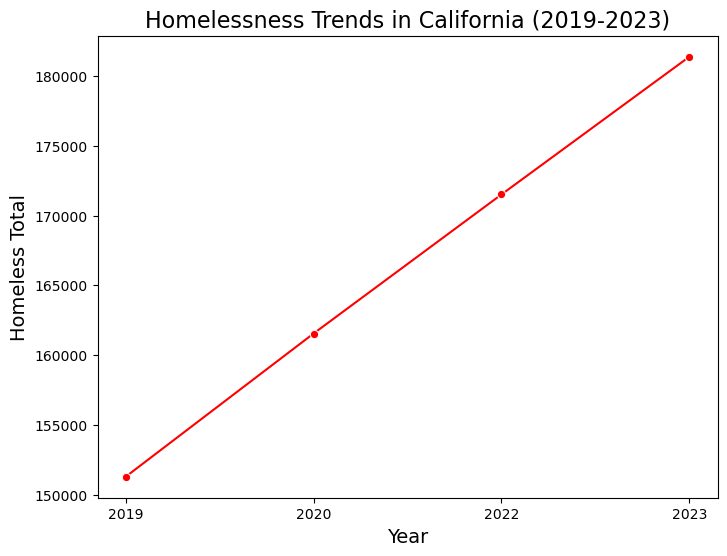

In [61]:
# Filter data for only California
california_data = merged_df[merged_df['County Name'] == 'California']

# Reshape California data for plotting (use of Github Co-pilot for this code)
melted_california_df = california_data.melt(
    id_vars=['County Name'], 
    value_vars=['Homeless Total_2019', 'Homeless Total_2020', 'Homeless Total_2022', 'Homeless Total_2023'],
    var_name='Year', 
    value_name='Homeless Total'
)

# Clean the 'Year' column (use of Github Co-pilot for this code)
melted_california_df['Year'] = melted_california_df['Year'].str.extract(r'(\d{4})')

# Plot for California (use of Github Co-pilot for this code)
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=melted_california_df, 
    x='Year', 
    y='Homeless Total', 
    marker='o', 
    color='red'
)

# Customizing the plot
plt.title('Homelessness Trends in California (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Homeless Total', fontsize=14)

plt.show()

# Graph 2: Los Angeles (The Biggest County)

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Year', ylabel='Homeless Total'>

Text(0.5, 1.0, 'Homelessness Trends in Los Angeles (2019-2023)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Homeless Total')

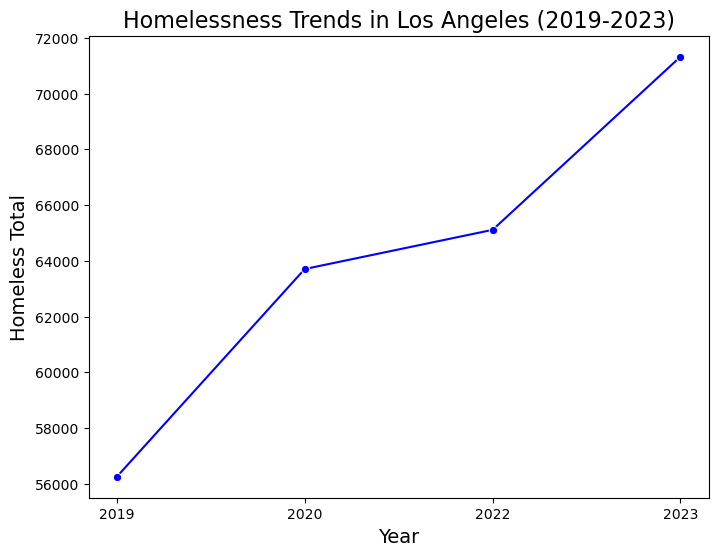

In [64]:
# Filter data for only Los Angeles
los_angeles_data = merged_df[merged_df['County Name'] == 'Los Angeles']

# Reshape Los Angeles data for plotting (use of Github Co-pilot for this code)
melted_la_df = los_angeles_data.melt(
    id_vars=['County Name'], 
    value_vars=['Homeless Total_2019', 'Homeless Total_2020', 'Homeless Total_2022', 'Homeless Total_2023'],
    var_name='Year', 
    value_name='Homeless Total'
)

# Clean the 'Year' column (use of Github Co-pilot for this code)
melted_la_df['Year'] = melted_la_df['Year'].str.extract(r'(\d{4})')

# Plot for Los Angeles (use of Github Co-pilot for this code)
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=melted_la_df, 
    x='Year', 
    y='Homeless Total', 
    marker='o', 
    color='blue'
)

# Customizing the plot
plt.title('Homelessness Trends in Los Angeles (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Homeless Total', fontsize=14)

plt.show()

# Graph 3: Runner Up Biggest Counties

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Year', ylabel='Homeless Total'>

Text(0.5, 1.0, 'Homelessness Trends in Large Counties (2019-2023)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Homeless Total')

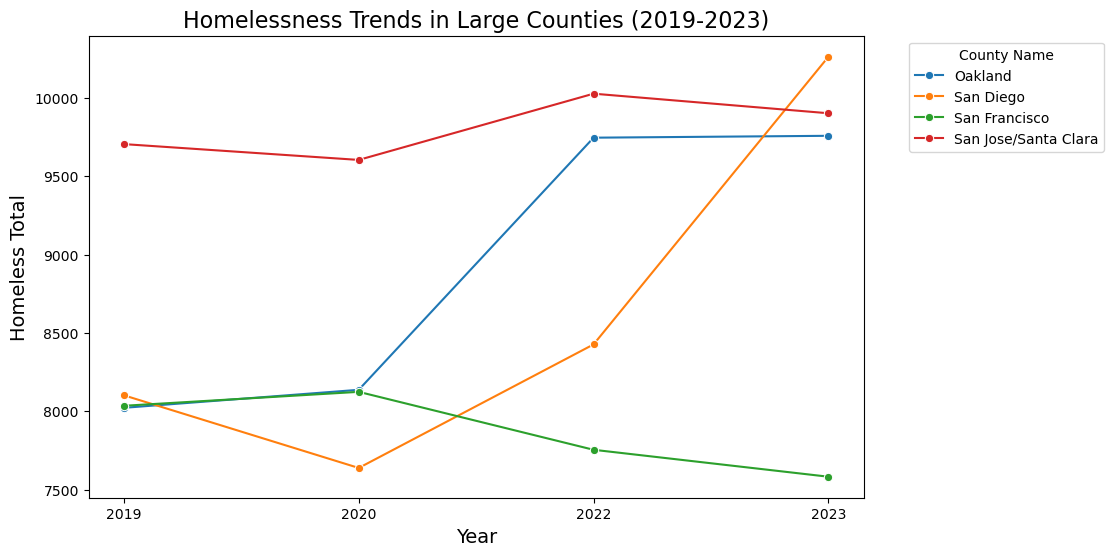

In [67]:
# Filter data for the other four counties
other_counties_data = merged_df[merged_df['County Name'].isin([
    'San Jose/Santa Clara', 
    'Oakland', 
    'San Diego', 
    'San Francisco'
])]

# Reshape data for the other counties (use of Github Co-pilot for this code)
melted_other_counties_df = other_counties_data.melt(
    id_vars=['County Name'], 
    value_vars=['Homeless Total_2019', 'Homeless Total_2020', 'Homeless Total_2022', 'Homeless Total_2023'],
    var_name='Year', 
    value_name='Homeless Total'
)

# Clean the 'Year' column (use of Github Co-pilot for this code)
melted_other_counties_df['Year'] = melted_other_counties_df['Year'].str.extract(r'(\d{4})')

# Plot for other counties (use of Github Co-pilot for this code)
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=melted_other_counties_df, 
    x='Year', 
    y='Homeless Total', 
    hue='County Name', 
    marker='o'
)

# Customizing the plot
plt.title('Homelessness Trends in Large Counties (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Homeless Total', fontsize=14)
plt.legend(title='County Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.show()


# What are the findings?

## 1. The data demonstrates that overall California has seen an increase in homelessness between 2019-2023 throughout the state and in most of the largest counties except for San Francisco which saw a decrease post pandemic.
## 2. The three charts above clearly demonstrate the change, and there is only one decrease post pandemic which was for San Francisco.
## 3. Although simple, this data can be useful for the state so they can understand where measures should be taken. First, viewing the line chart for California from 2019-2023, it appears that from 2020-2022 there is a decrease in the rate in which homelessness is increasing. From our research, we know that within this timeframe California began giving out relief funding, which is likely the reason why the rate of homelessness increasing slowed down. Additionally, something to consider is that the population of California has been decreasing over the last few years. This indicates that while homelessness is increasing, the overall population of the state is not. This signifies that the homeless population is going up not due to a natural increase in population, and there is a different factor to consider.
## 3b. Viewing the second graph regarding Los Angeles, we again see a smaller increase in the rate at which homelessness is increasing from 2020-2022. This again is likely due to the funding they received in that time frame. We also know that Los Angeles received the most funding out of any county, and yet their homeless pouplation is increasing regardless. This indicates that there may not be a significant correlation between funding and homelessness.
## 3c. Lastly, for the third graph, it appears that what San Francisco has implemented is working to decrease the number of homeless individuals. It is the only county from these graphs that has a notable decrease in homelessness. Unfortunately, we do not know the exact reason why they have decreased in homeless populations, and looking into policies put into place over the last few years could be a next step. It could be the case that they are simply relocating those homeless people to other counties, or falsely reporting their homeless pouplation numbers. Still, in the event they have figured something out that does work, other counties may want to take note of their strategies and do something similar to prevent homelessness in their counties as well. This graph tells the state of California, that San Francisco could be something to look into, and learn from.

# Hypothesis #3 - Josh

### Hypothesis 3: Counties that received higher COVID-19 relief funding per capita experienced a smaller rise in homelessness rates compared to those with lower relief funding.  

In [2]:
import pandas as pd

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#Set to 2 decimal places, and display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

In [6]:
#We created our CSV files by hand, but opted to merge them later. This code just imports all 6.

df2019  = pd.read_csv('HomelessnessbyCountyOverTime - 2019.csv', index_col=0)
df2020  = pd.read_csv('HomelessnessbyCountyOverTime - 2020.csv', index_col=0)
df2022  = pd.read_csv('HomelessnessbyCountyOverTime - 2022.csv', index_col=0)
df2023  = pd.read_csv('HomelessnessbyCountyOverTime - 2023.csv', index_col=0)
df_countyincomes  = pd.read_csv('HomelessnessbyCountyOverTime - County Incomes.csv', index_col=0)
df_monetaryrelief  = pd.read_csv('HomelessnessbyCountyOverTime - Monetary Relief.csv', index_col=0)

In [8]:
#Rename all of the Homeless Totals to fit with their corresponding dfs in order to make merge possible

df2019 = df2019.rename(columns={"Homeless Total": "Homeless Total_2019"})
df2020 = df2020.rename(columns={"Homeless Total": "Homeless Total_2020"})
df2022 = df2022.rename(columns={"Homeless Total": "Homeless Total_2022"})
df2023 = df2023.rename(columns={"Homeless Total": "Homeless Total_2023"})

In [10]:
#Testing
df2019.head()

,Homeless Total_2019
County Name,
San Jose/Santa Clara,9706
San Francisco,8035
Oakland,8022
Sacramento,5561
"Santa Rosa, Petaluma/Sonoma",2951


In [12]:
#Testing
df2020.head()

,Homeless Total_2020
County Name,
San Jose/Santa Clara,9605
San Francisco,8124
Oakland,8137
Sacramento,5511
"Santa Rosa, Petaluma/Sonoma",2745


In [14]:
#Testing
df2022.head()

,Homeless Total_2022
County Name,
San Jose/Santa Clara,10028
San Francisco,7754
Oakland,9747
Sacramento,9278
"Santa Rosa, Petaluma/Sonoma",2893


In [18]:
#Testing
df2023.head()

,Homeless Total_2023
County Name,
San Jose/Santa Clara,9903
San Francisco,7582
Oakland,9759
Sacramento,9281
"Santa Rosa, Petaluma/Sonoma",2266


In [16]:
#Testing
df_countyincomes.head()

,Median Income
County Name,
San Jose/Santa Clara,153792
Daly City/San Mateo,149907
Marin,142019
San Francisco,136689
Oakland,122488


In [20]:
#Testing
df_monetaryrelief.head()

,Monetary Relief
County Name,
San Jose/Santa Clara,31514029.00
Daly City/San Mateo,17794236.00
Marin,26594123.00
San Francisco,20660712.00
Oakland,NaN


In [22]:
#This code merges everything into one data frame and drops the California row to make te analysis of each county possible
df = (df2019.merge(df2020, on="County Name", how="inner")
                 .merge(df2022, on="County Name", how="inner")
                 .merge(df2023, on="County Name", how="inner")
                 .merge(df_countyincomes, on="County Name", how="inner")
                 .merge(df_monetaryrelief, on="County Name", how="inner"))
df = df.drop("California", axis=0)

In [24]:
#Drops any remaining NAs to be safe
df = df.dropna()
df.head(5)

,Homeless Total_2019,Homeless Total_2020,Homeless Total_2022,Homeless Total_2023,Median Income,Monetary Relief
County Name,,,,,,
San Jose/Santa Clara,9706,9605,10028,9903,153792,31514029.00
San Francisco,8035,8124,7754,7582,136689,20660712.00
Sacramento,5561,5511,9278,9281,84010,24982972.00
"Santa Rosa, Petaluma/Sonoma",2951,2745,2893,2266,99266,50263852.00
Richmond/Contra Costa,2295,2277,3093,2372,120020,26546260.00


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Monetary Relief', ylabel='Homeless Change (%)'>

Text(24982972.0, 68.35420068953003, 'Sacramento')

Text(163402515.0, 2.205443757259913, 'Los Angeles')

Text(73509392.0, -18.056749785038694, 'Santa Ana, Anaheim/Orange')

Text(0.05, 0.95, '$R^2 = 0.004$')

Text(0.5, 0, 'Monetary Relief (USD)')

Text(0, 0.5, 'Percentage Change in Homelessness (2020-2022)')

Text(0.5, 1.0, 'Dotplot with Regression Line: % Change in Homelessness vs Monetary Relief')

([<matplotlib.axis.XTick at 0x16a1ea4e0>,
 [Text(-20000000.0, 0, '-20M'),
  Text(0.0, 0, '0M'),
  Text(20000000.0, 0, '20M'),
  Text(40000000.0, 0, '40M'),
  Text(60000000.0, 0, '60M'),
  Text(80000000.0, 0, '80M'),
  Text(100000000.0, 0, '100M'),
  Text(120000000.0, 0, '120M'),
  Text(140000000.0, 0, '140M'),
  Text(160000000.0, 0, '160M'),
  Text(180000000.0, 0, '180M')])

(0.0, 180000000.0)

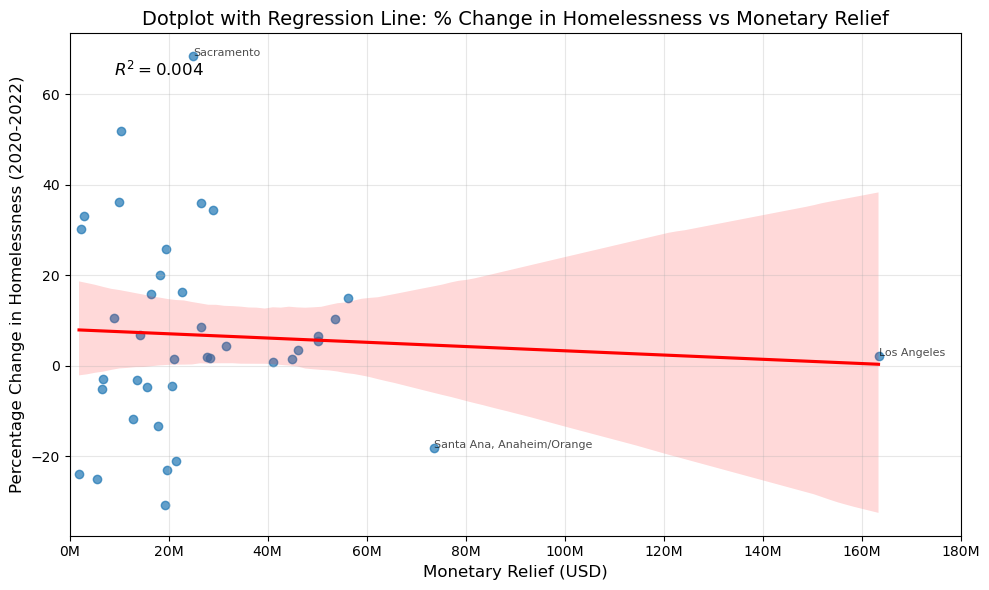

In [26]:
#The below code creates a dotplot comparing Monetary Compensation with how the homeless population varied from 2020 to 2022 for each county
#Our hypothesis is this would trend downward, with counties that received more compensation in 2020 would see a sharper decrease in homelessness
#The graph also labels the outliers for analysis purposes
 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calculate the percentage change in homelessness from 2020 to 2022
df['Homeless Change (%)'] = ((df['Homeless Total_2022'] - df['Homeless Total_2020']) /
                              df['Homeless Total_2020']) * 100

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Monetary Relief'], df['Homeless Change (%)'])

# Create the dotplot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Monetary Relief',
    y='Homeless Change (%)',
    data=df,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'}
)

# Annotate only the specified counties
for county in ["Sacramento", "Los Angeles", "Santa Ana, Anaheim/Orange"]:
    plt.annotate(county, 
                 (df.loc[county, 'Monetary Relief'], df.loc[county, 'Homeless Change (%)']),
                 fontsize=8, alpha=0.7)

# Annotate the R-squared value
r_squared = r_value**2
plt.text(
    0.05, 0.95, f'$R^2 = {r_squared:.3f}$',
    fontsize=12, transform=plt.gca().transAxes,
    verticalalignment='top'
)

# Add labels and title
plt.xlabel('Monetary Relief (USD)', fontsize=12)
plt.ylabel('Percentage Change in Homelessness (2020-2022)', fontsize=12)
plt.title('Dotplot with Regression Line: % Change in Homelessness vs Monetary Relief', fontsize=14)

# Adjust x-axis to display values in millions
plt.xticks(ticks=plt.gca().get_xticks(), labels=[f'{int(x / 1_000_000)}M' for x in plt.gca().get_xticks()])
plt.xlim(left=0)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The above graph shows that Sacramento experienced a massive growth in homelessness over the two years, and also received very little funding This makes our hypothesis seems right, but falls apart with other points, such as LA which received by far the most money but experienced little change As the graph shows, there seemed to be very little effect on change in homelessness based on monetary relief Perhaps we should have looked at relief per capita to get a better view, but our current R^2 value shows next to no correlation Thus, there is no evidence to support our hypothesis

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Monetary Relief', ylabel='Homeless Change (%)'>

Text(0.05, 0.95, '$R^2 = 0.001$')

Text(0.5, 0, 'Monetary Relief (USD)')

Text(0, 0.5, 'Percentage Change in Homelessness (2020-2022)')

Text(0.5, 1.0, 'Dotplot with Regression Line: % Change in Homelessness vs Monetary Relief (Filtered Counties)')

([<matplotlib.axis.XTick at 0x16a36b0b0>,
 [Text(-10000000.0, 0, '-10M'),
  Text(0.0, 0, '0M'),
  Text(10000000.0, 0, '10M'),
  Text(20000000.0, 0, '20M'),
  Text(30000000.0, 0, '30M'),
  Text(40000000.0, 0, '40M'),
  Text(50000000.0, 0, '50M'),
  Text(60000000.0, 0, '60M')])

(0.0, 60000000.0)

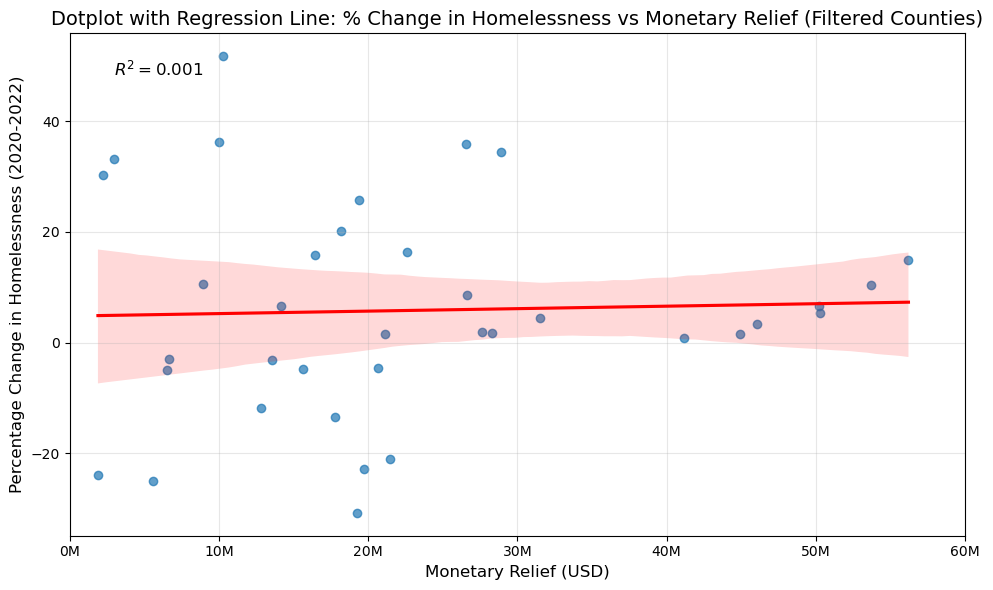

In [29]:
#This code does the same thing but drops the 3 labeled outliers to see if there is any more consistency
#As we can see below, not much changed and there is still next to no evidence to support our hypothesis

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Drop the specified counties
df_filtered = df.drop(index=["Sacramento", "Los Angeles", "Santa Ana, Anaheim/Orange"])

# Calculate the percentage change in homelessness from 2020 to 2022
df_filtered['Homeless Change (%)'] = ((df_filtered['Homeless Total_2022'] - df_filtered['Homeless Total_2020']) /
                                      df_filtered['Homeless Total_2020']) * 100

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_filtered['Monetary Relief'], df_filtered['Homeless Change (%)'])

# Create the dotplot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Monetary Relief',
    y='Homeless Change (%)',
    data=df_filtered,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'}
)

# Annotate the R-squared value
r_squared = r_value**2
plt.text(
    0.05, 0.95, f'$R^2 = {r_squared:.3f}$',
    fontsize=12, transform=plt.gca().transAxes,
    verticalalignment='top'
)

# Add labels and title
plt.xlabel('Monetary Relief (USD)', fontsize=12)
plt.ylabel('Percentage Change in Homelessness (2020-2022)', fontsize=12)
plt.title('Dotplot with Regression Line: % Change in Homelessness vs Monetary Relief (Filtered Counties)', fontsize=14)

# Adjust x-axis to display values in millions
plt.xticks(ticks=plt.gca().get_xticks(), labels=[f'{int(x / 1_000_000)}M' for x in plt.gca().get_xticks()])
plt.xlim(left=0)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
